# Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

***
***

# Reading Data

In [4]:
fuel = pd.read_csv('2004-2021.tsv', sep='\t')
fuel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [5]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

The date columns need type transformation.

## Data transformation

In [6]:
fuel['DATA INICIAL'] = pd.to_datetime(fuel['DATA INICIAL'])
fuel['DATA FINAL'] = pd.to_datetime(fuel['DATA FINAL'])

fuel['year'] = fuel['DATA FINAL'].dt.year
fuel['month'] = fuel['DATA FINAL'].dt.month

In [7]:
fuel = fuel.reindex(columns=['DATA INICIAL', 'DATA FINAL', 'year', 'month', 'REGIÃO', 'ESTADO', 'PRODUTO',
                             'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
                             'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
                             'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
                             'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
                             'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
                             'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [8]:
fuel.dtypes

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
year                                      int64
month                                     int64
REGIÃO                                   object
ESTADO                                   object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                     object
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PREÇO MÍNIMO DISTRIBUIÇÃO                object
PREÇO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO            object
dtype: object

In [9]:
fuel = fuel.drop(['DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
                  'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
                  'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
                  'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
                  'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'], axis='columns')

In [10]:
fuel = fuel.rename(columns={'DATA INICIAL': 'first_date', 'DATA FINAL': 'last_date', 
                            'REGIÃO':'region', 'ESTADO':'state', 'PRODUTO':'product',
                            'NÚMERO DE POSTOS PESQUISADOS':'gas_stations_researched', 
                            'UNIDADE DE MEDIDA':'measure_unit','PREÇO MÉDIO REVENDA':'sale_avg_price'
                            }
                )

In [11]:
fuel.head()

,first_date,last_date,year,month,region,state,product,gas_stations_researched,measure_unit,sale_avg_price
0,2004-05-09,2004-05-15,2004,5,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288
1,2004-05-09,2004-05-15,2004,5,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162
2,2004-05-09,2004-05-15,2004,5,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389
3,2004-05-09,2004-05-15,2004,5,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262
4,2004-05-09,2004-05-15,2004,5,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181


***
***

# Exploratory Analysis

Setting graph style

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [13]:
fuel['product'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

Gasoline, Diesel and Ethanol are the most common fuel types in Brazil.

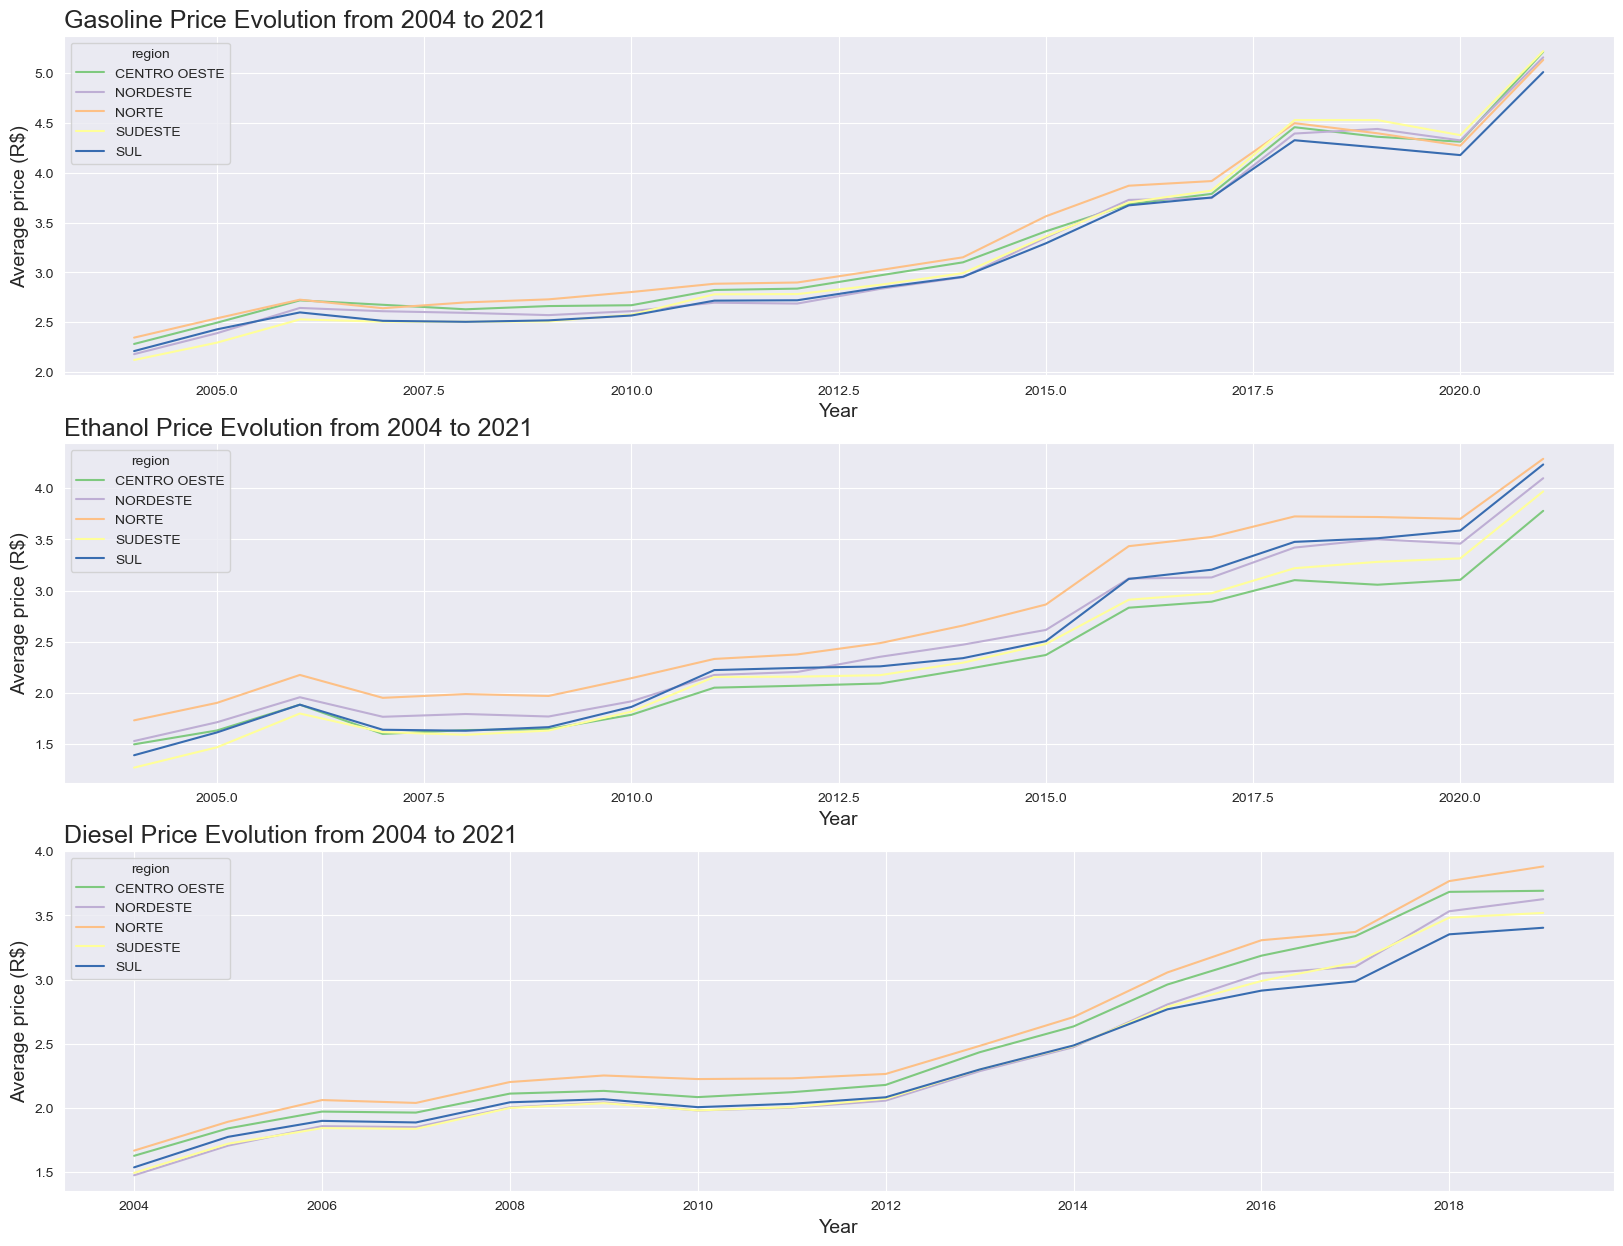

In [14]:
plt.figure(figsize=(20,15))
ax = plt.subplot(3,1,1)
ax.set_title('Gasoline Price Evolution from 2004 to 2021', fontsize=18, loc='left')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average price (R$)', fontsize=14)
ax = sns.lineplot(x='year', y='sale_avg_price', hue='region', data=fuel.query('product == "GASOLINA COMUM"'), ci=None)
ax = plt.subplot(3,1,2)
ax.set_title('Ethanol Price Evolution from 2004 to 2021', fontsize=18, loc='left')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average price (R$)', fontsize=14)
ax = sns.lineplot(x='year', y='sale_avg_price', hue='region', data=fuel.query('product == "ETANOL HIDRATADO"'), ci=None)
ax = plt.subplot(3,1,3)
ax.set_title('Diesel Price Evolution from 2004 to 2021', fontsize=18, loc='left')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average price (R$)', fontsize=14)
ax = sns.lineplot(x='year', y='sale_avg_price', hue='region', data=fuel.query('product == "ÓLEO DIESEL"'), ci=None)
ax=ax

All the fuel types had a similar price growth through years in all regions. <br> 
The south and southeast regions showed the lowest prices for Diesel and Ethanol, but southeast had an increase in Gasoline price after 2015. <br>
North region had the highest average prices for all fuel types.<br><br>

We can take a deeper look into de states of these 3 regions.



### **North region**

In [15]:
fuel_north = fuel.copy()
fuel_north = fuel_north.query('region == "NORTE"')
fuel_north['growth'] = fuel_north.sale_avg_price.diff()
fuel_north['accel'] = fuel_north.growth.diff()

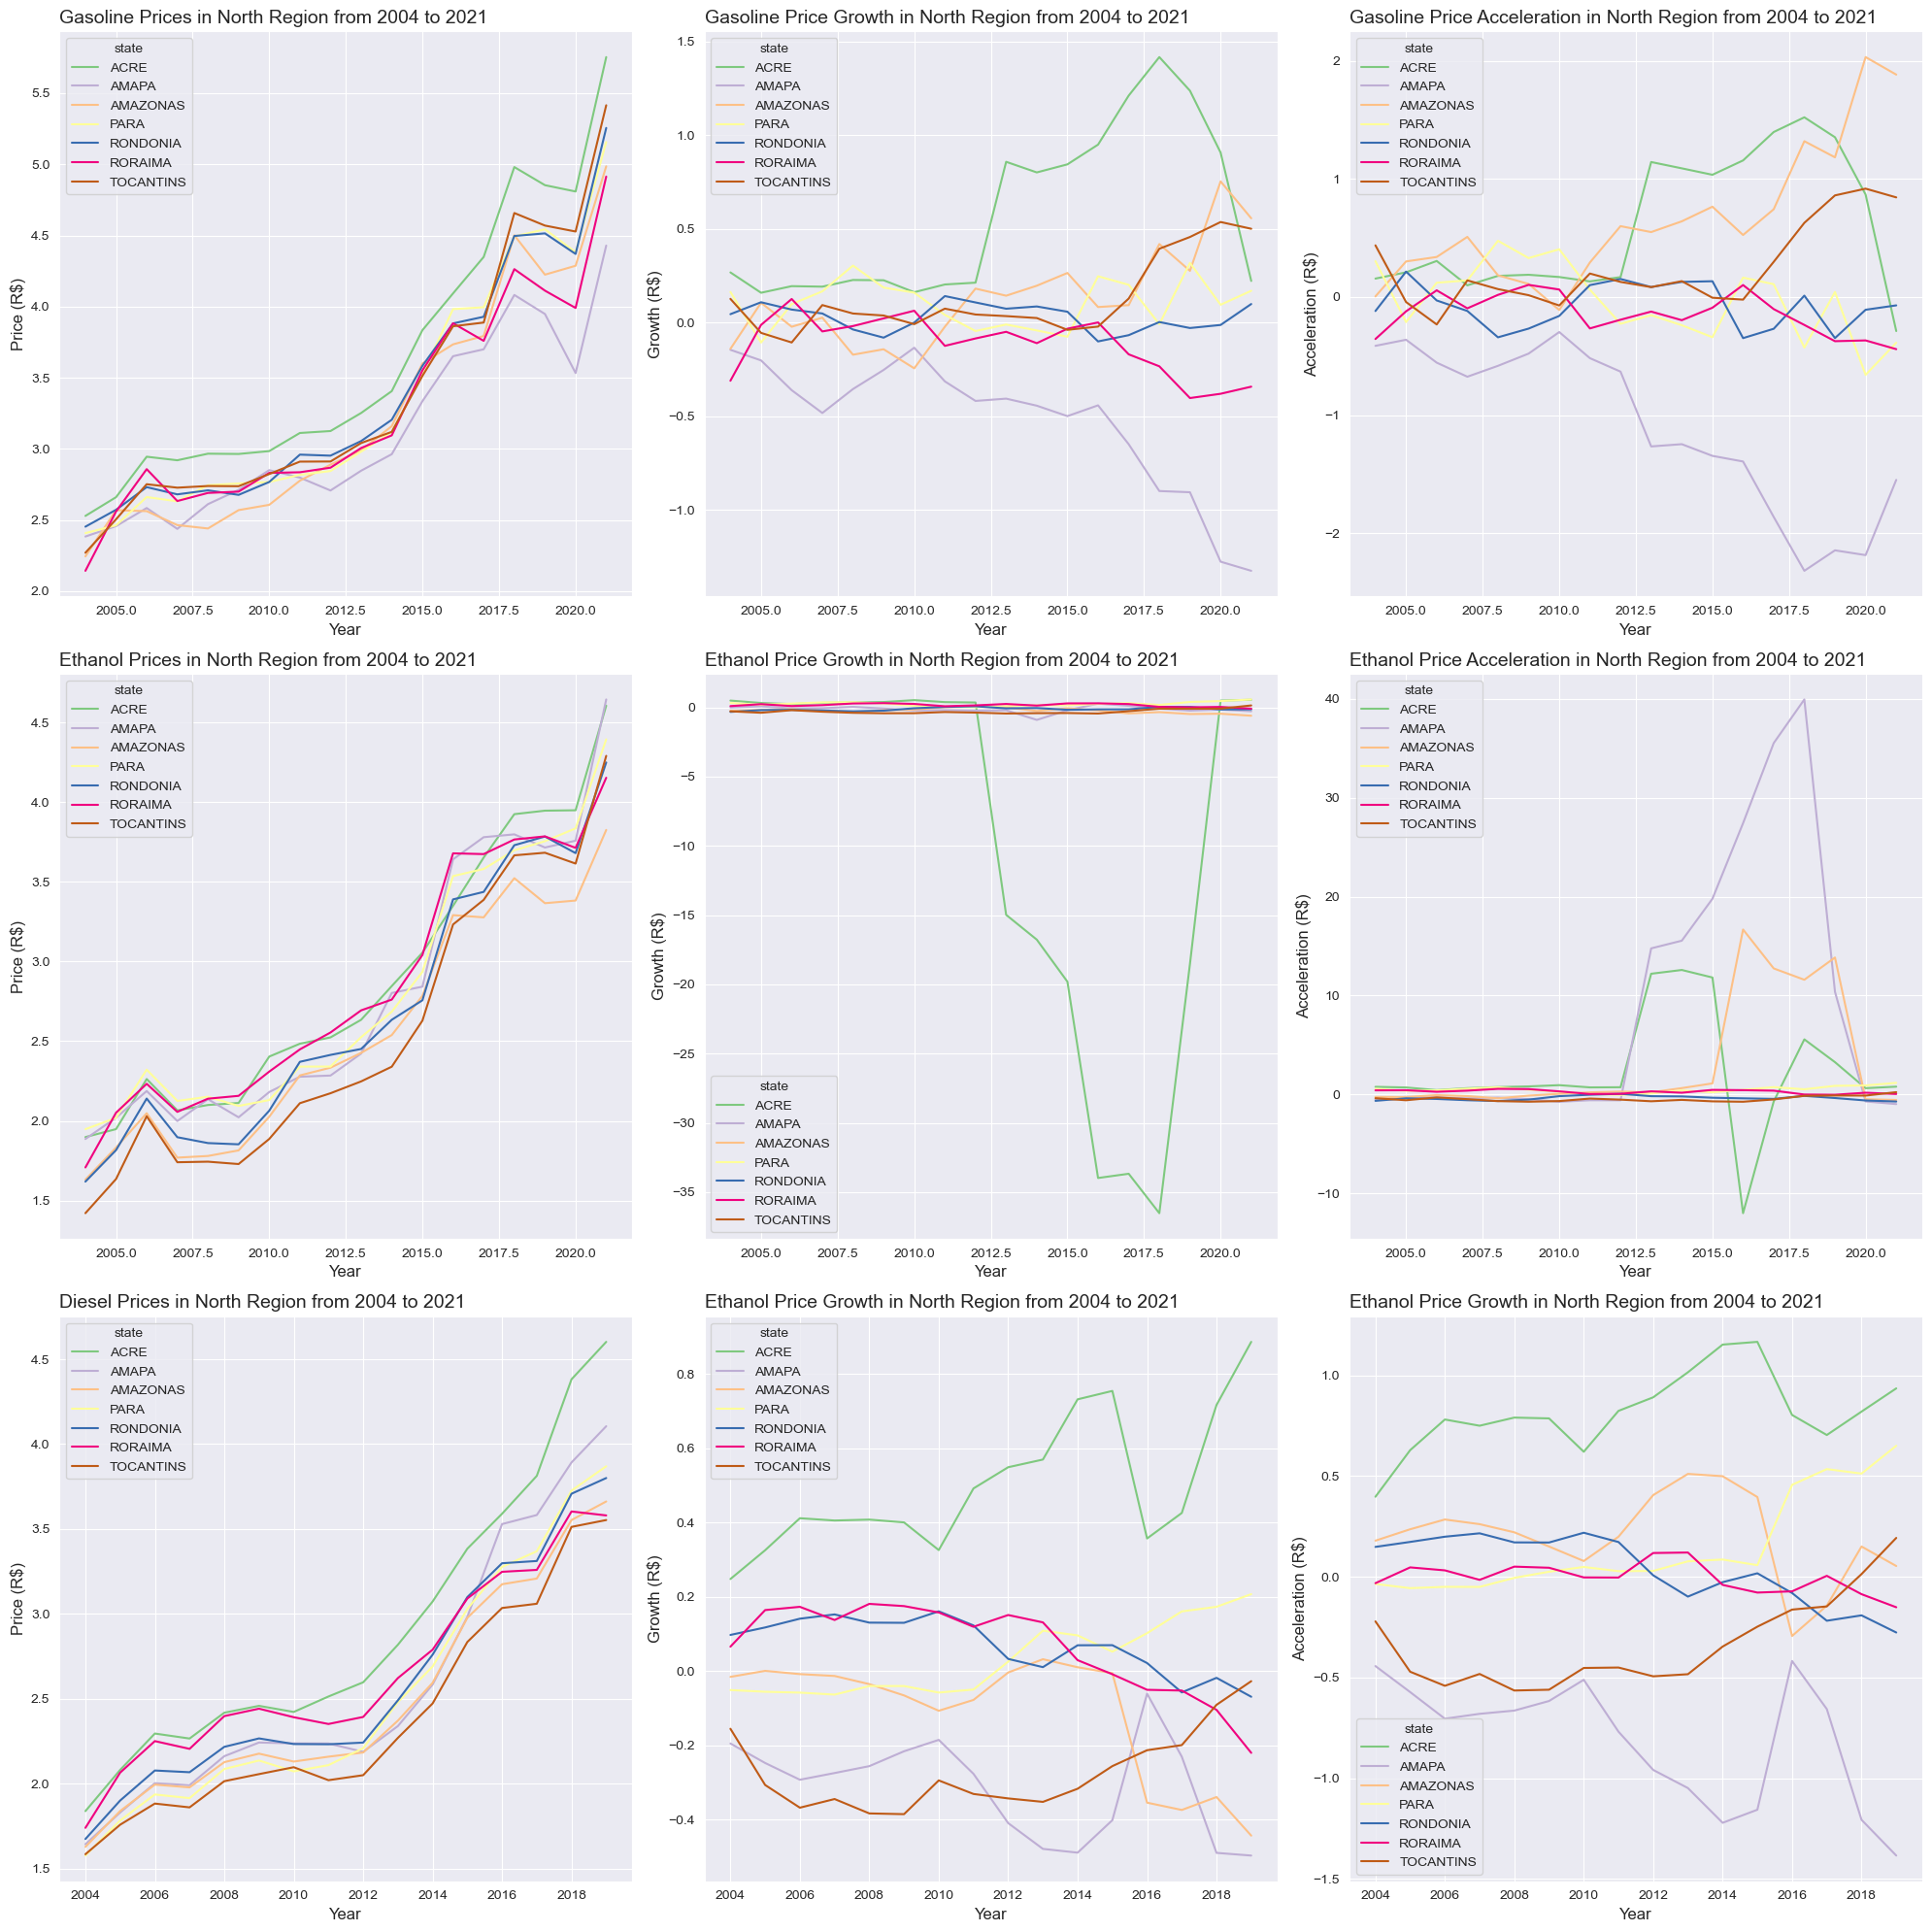

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Plots
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_north.query('product == "GASOLINA COMUM"'), ax=axs[0, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_north.query('product == "GASOLINA COMUM"'), ax=axs[0, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_north.query('product == "GASOLINA COMUM"'), ax=axs[0, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_north.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_north.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_north.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_north.query('product == "ÓLEO DIESEL"'), ax=axs[2, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_north.query('product == "ÓLEO DIESEL"'), ax=axs[2, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_north.query('product == "ÓLEO DIESEL"'), ax=axs[2, 2], ci=None)

# Plot titles
axs[0, 0].set_title('Gasoline Prices in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 1].set_title('Gasoline Price Growth in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 2].set_title('Gasoline Price Acceleration in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 0].set_title('Ethanol Prices in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 1].set_title('Ethanol Price Growth in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 2].set_title('Ethanol Price Acceleration in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 0].set_title('Diesel Prices in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 1].set_title('Ethanol Price Growth in North Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 2].set_title('Ethanol Price Growth in North Region from 2004 to 2021', fontsize=14, loc='left')

# Labels
axs[0, 0].set_xlabel('Year', fontsize=12)
axs[0, 0].set_ylabel('Price (R$)', fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)
axs[0, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[0, 2].set_xlabel('Year', fontsize=12)
axs[0, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)
axs[1, 0].set_ylabel('Price (R$)', fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)
axs[1, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[1, 2].set_xlabel('Year', fontsize=12)
axs[1, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Price (R$)', fontsize=12)
axs[2, 1].set_xlabel('Year', fontsize=12)
axs[2, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[2, 2].set_xlabel('Year', fontsize=12)
axs[2, 2].set_ylabel('Acceleration (R$)', fontsize=12)

# Reducing space between plots
fig.tight_layout()

plt.show()

The state of Acre had the highest prices for Diesel and Gasoline. Ethanol price growth were less constant and there was not a predominat state with higher prices.<br>
Tocantis showed the lowest prices for Diesel (through whole period) and for Ethanol (until late 2015). It did'nt happen for Gasoline, that had Amazonas until 2011 and then Amapá with lowest prices.<br><br>
Until 2012 the price changes were more constant, but after it became more unstable, specially for Gasoline and Ethanol.

### **Southeast region**

In [17]:
fuel_southeast = fuel.copy()
fuel_southeast = fuel_southeast.query('region == "SUDESTE"')
fuel_southeast['growth'] = fuel_southeast.sale_avg_price.diff()
fuel_southeast['accel'] = fuel_southeast.growth.diff()

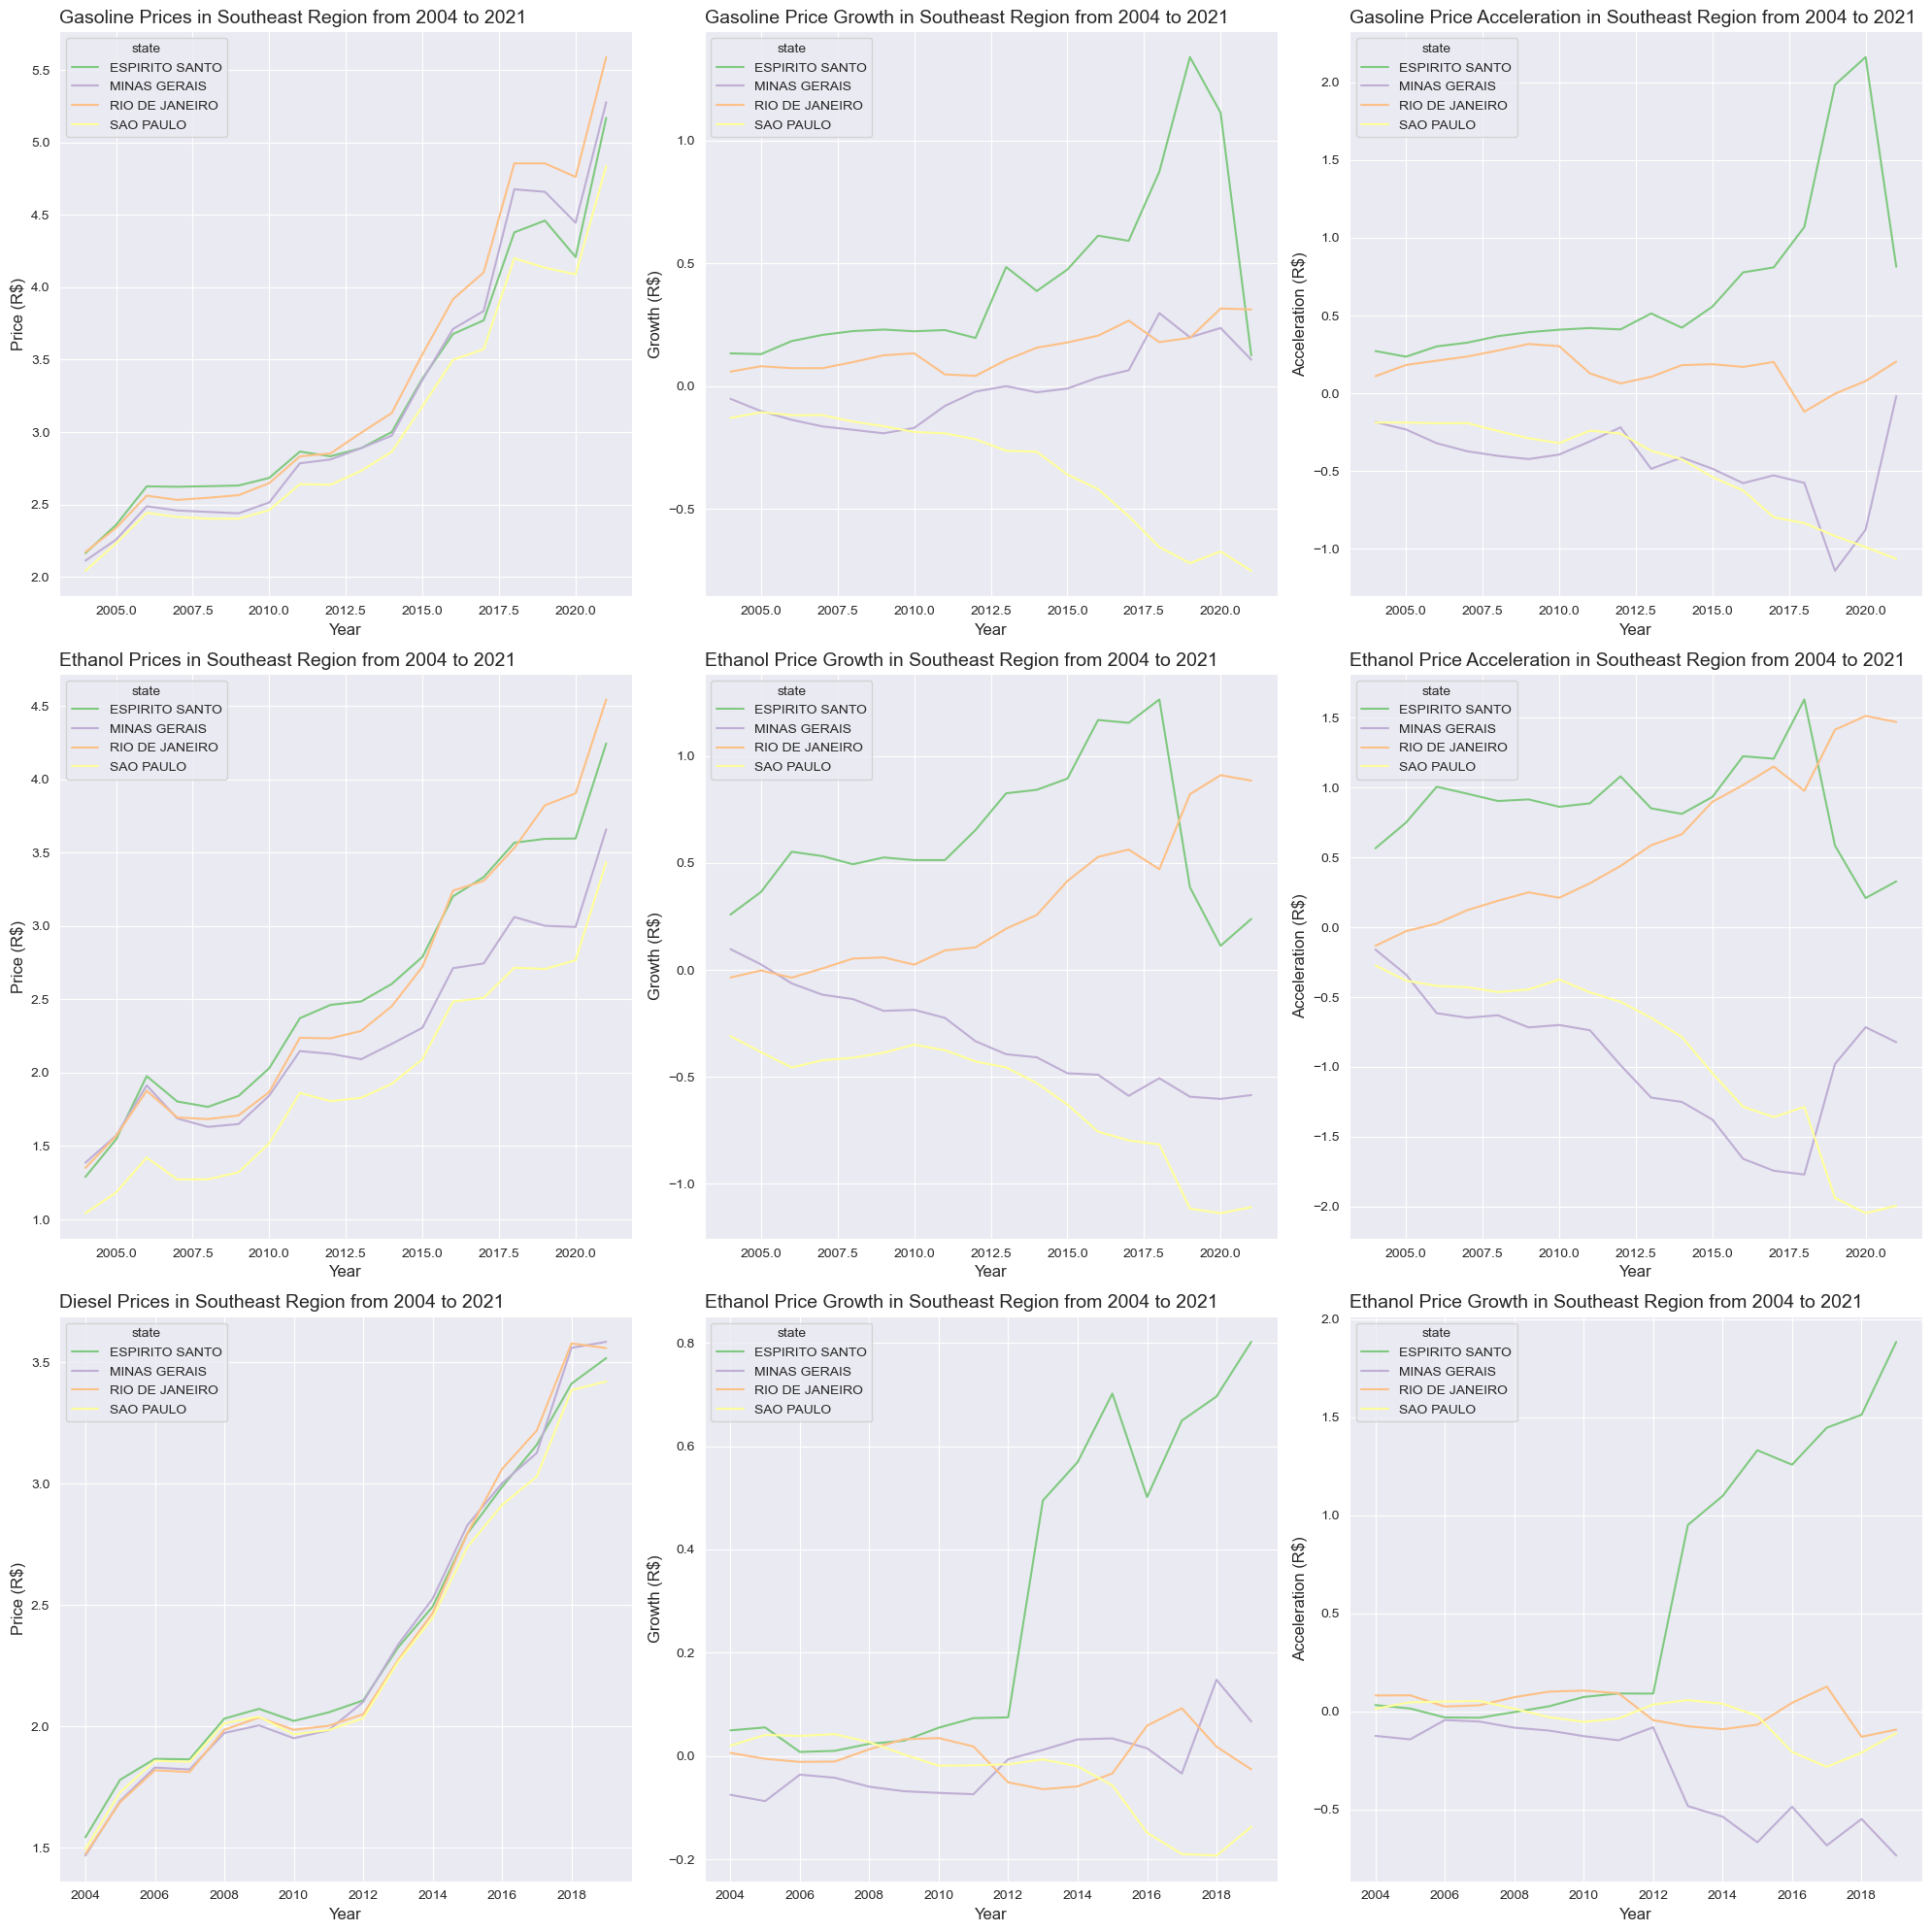

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Plots
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_southeast.query('product == "GASOLINA COMUM"'), ax=axs[0, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_southeast.query('product == "GASOLINA COMUM"'), ax=axs[0, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_southeast.query('product == "GASOLINA COMUM"'), ax=axs[0, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_southeast.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_southeast.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_southeast.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_southeast.query('product == "ÓLEO DIESEL"'), ax=axs[2, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_southeast.query('product == "ÓLEO DIESEL"'), ax=axs[2, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_southeast.query('product == "ÓLEO DIESEL"'), ax=axs[2, 2], ci=None)

# Plot titles
axs[0, 0].set_title('Gasoline Prices in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 1].set_title('Gasoline Price Growth in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 2].set_title('Gasoline Price Acceleration in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 0].set_title('Ethanol Prices in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 1].set_title('Ethanol Price Growth in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 2].set_title('Ethanol Price Acceleration in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 0].set_title('Diesel Prices in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 1].set_title('Ethanol Price Growth in Southeast Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 2].set_title('Ethanol Price Growth in Southeast Region from 2004 to 2021', fontsize=14, loc='left')

# Labels
axs[0, 0].set_xlabel('Year', fontsize=12)
axs[0, 0].set_ylabel('Price (R$)', fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)
axs[0, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[0, 2].set_xlabel('Year', fontsize=12)
axs[0, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)
axs[1, 0].set_ylabel('Price (R$)', fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)
axs[1, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[1, 2].set_xlabel('Year', fontsize=12)
axs[1, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Price (R$)', fontsize=12)
axs[2, 1].set_xlabel('Year', fontsize=12)
axs[2, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[2, 2].set_xlabel('Year', fontsize=12)
axs[2, 2].set_ylabel('Acceleration (R$)', fontsize=12)

# Reducing space between plots
fig.tight_layout()

plt.show()

São Paulo state has the lowest prices for Gasoline and Ethanol, but only after 2012 for Diesel.<br>
The Gasoline highest prices came from Espírito Santo until 2011 and then from Rio de Janeiro. It was similar with Ethanol, Espírito Santo up to 2017 then Rio de Janeiro.<br>
Espírito Santo had the highest prices in Diesel until 2012.<br><br>

Similar to North region, the prices suffered more changes after 2012, mostly with Diesel in Espírito Santo.

### **South region**

In [19]:
fuel_south = fuel.copy()
fuel_south = fuel_south.query('region == "SUL"')
fuel_south['growth'] = fuel_south.sale_avg_price.diff()
fuel_south['accel'] = fuel_south.growth.diff()

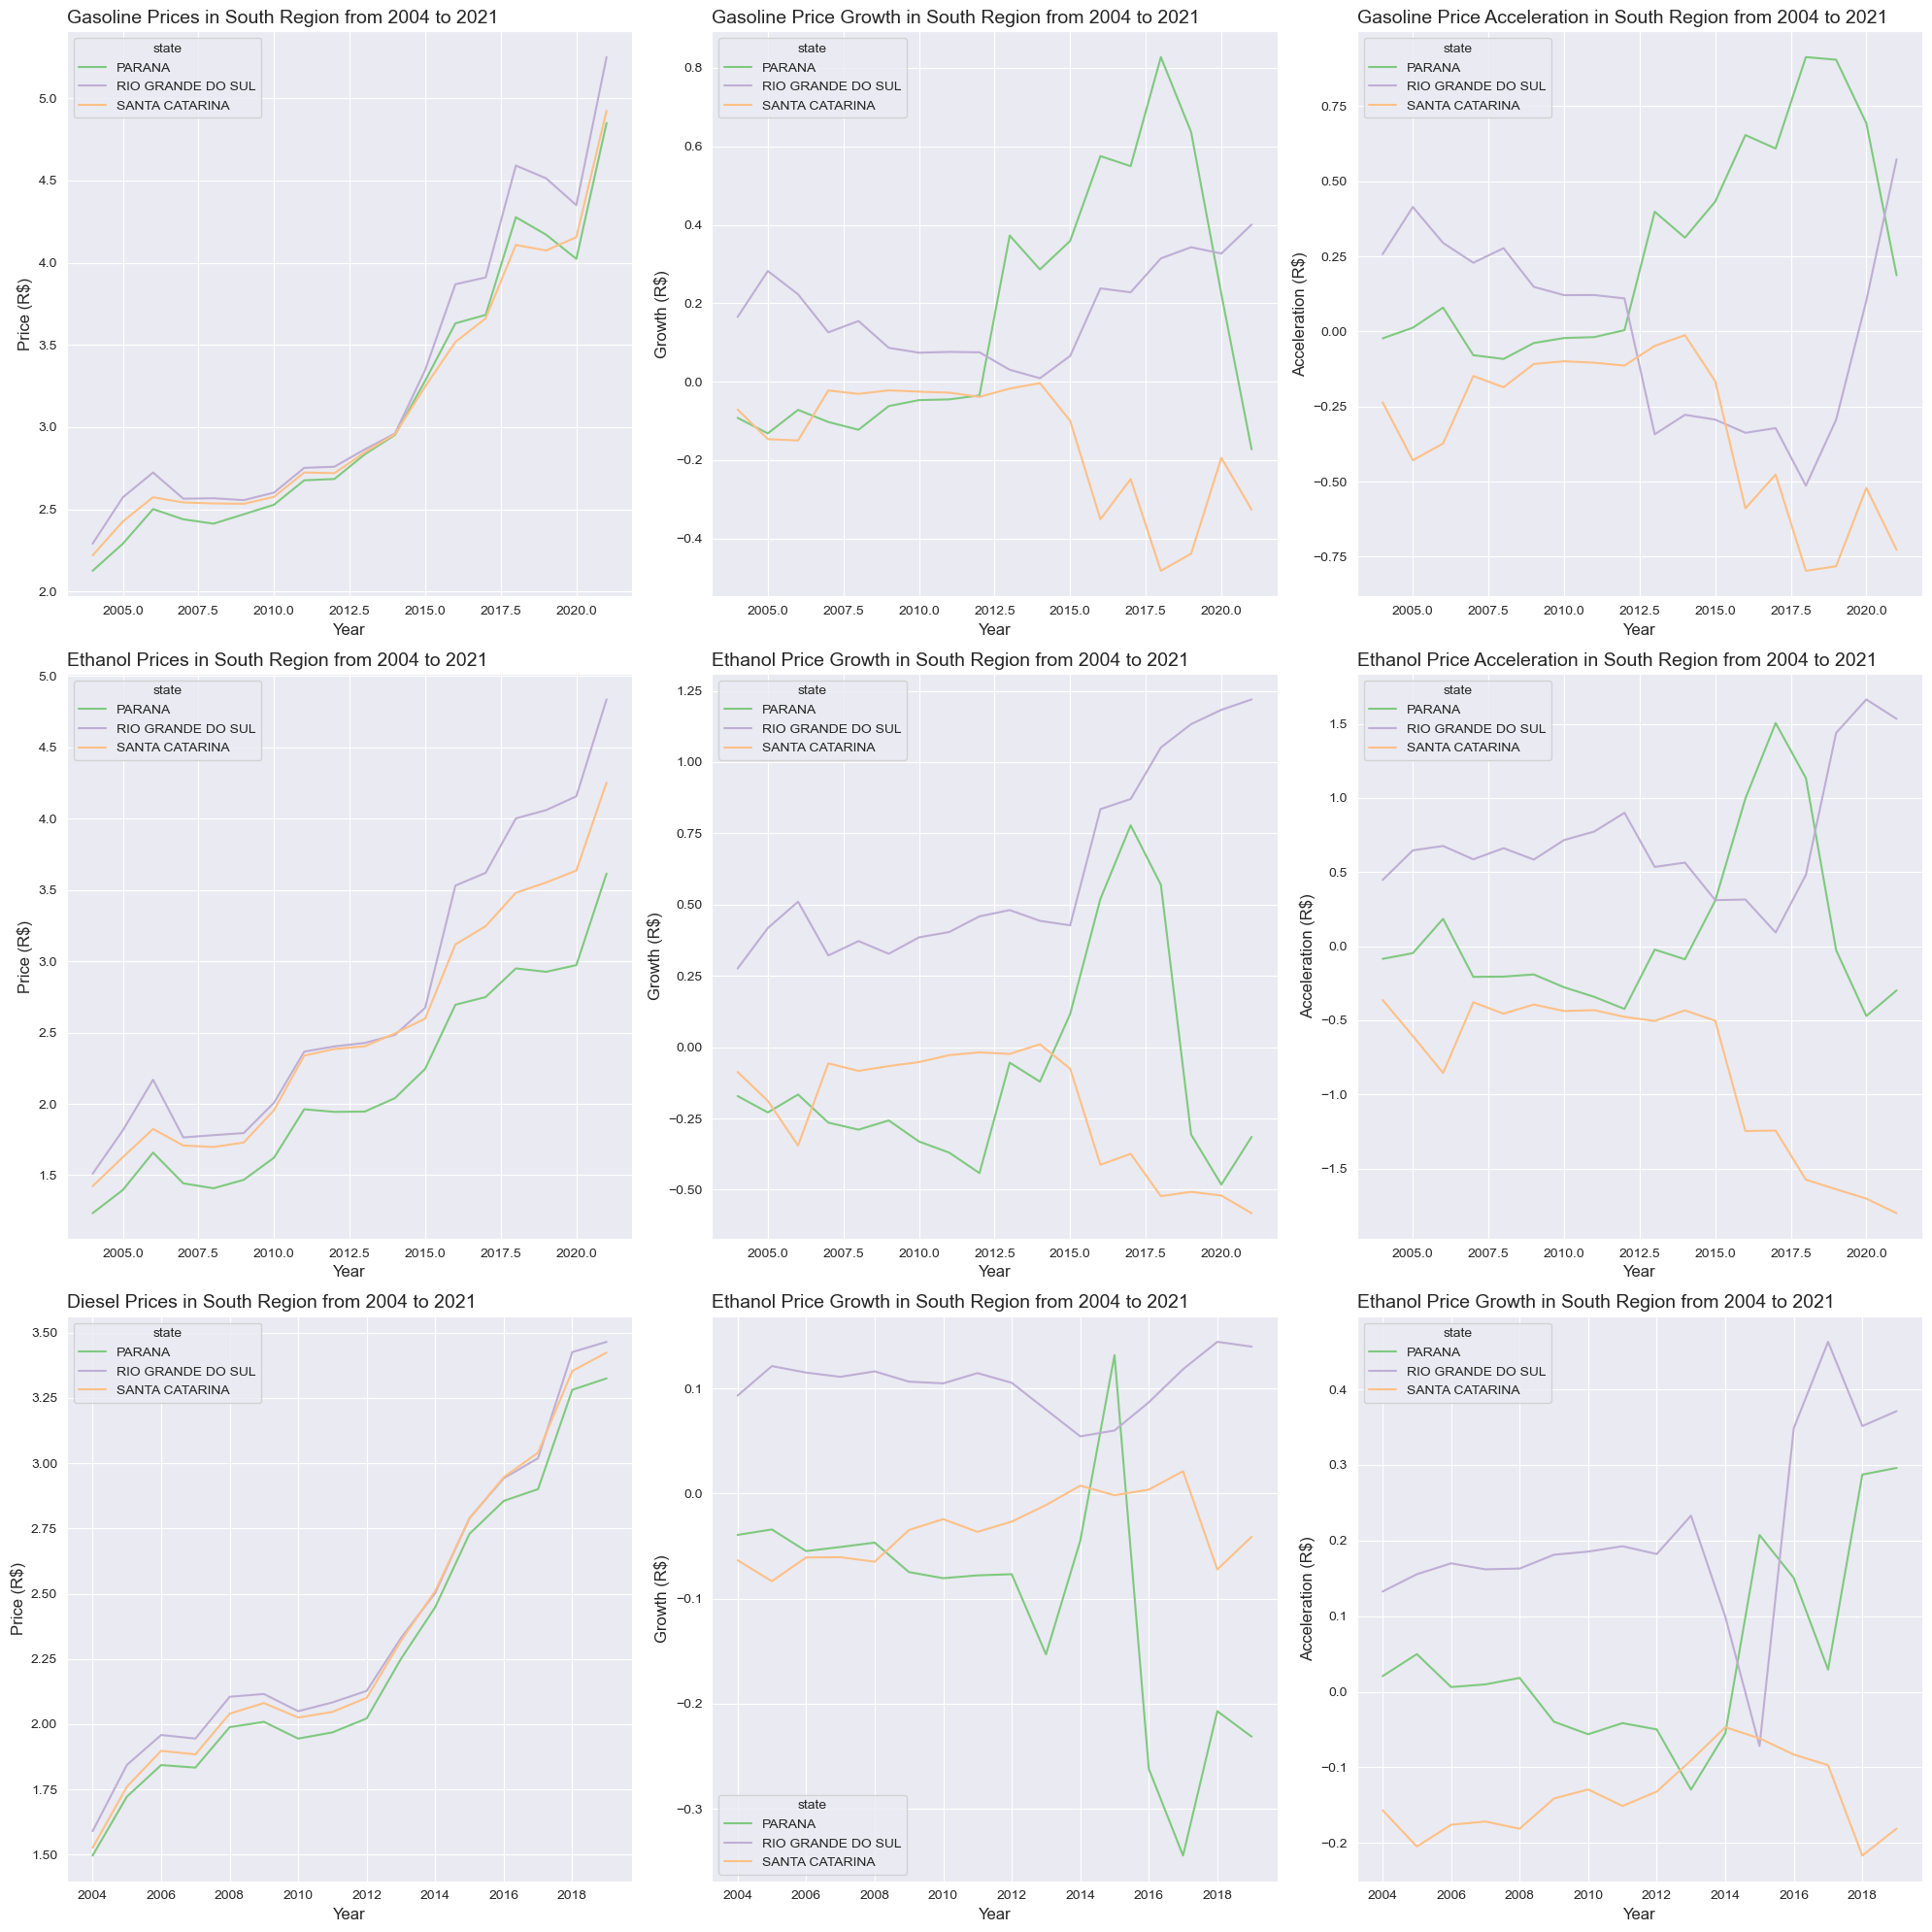

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Plots
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_south.query('product == "GASOLINA COMUM"'), ax=axs[0, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_south.query('product == "GASOLINA COMUM"'), ax=axs[0, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_south.query('product == "GASOLINA COMUM"'), ax=axs[0, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_south.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_south.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_south.query('product == "ETANOL HIDRATADO"'), ax=axs[1, 2], ci=None)
sns.lineplot(x='year', y='sale_avg_price', hue='state', data=fuel_south.query('product == "ÓLEO DIESEL"'), ax=axs[2, 0], ci=None)
sns.lineplot(x='year', y='growth', hue='state', data=fuel_south.query('product == "ÓLEO DIESEL"'), ax=axs[2, 1], ci=None)
sns.lineplot(x='year', y='accel', hue='state', data=fuel_south.query('product == "ÓLEO DIESEL"'), ax=axs[2, 2], ci=None)

# Plot titles
axs[0, 0].set_title('Gasoline Prices in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 1].set_title('Gasoline Price Growth in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[0, 2].set_title('Gasoline Price Acceleration in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 0].set_title('Ethanol Prices in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 1].set_title('Ethanol Price Growth in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[1, 2].set_title('Ethanol Price Acceleration in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 0].set_title('Diesel Prices in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 1].set_title('Ethanol Price Growth in South Region from 2004 to 2021', fontsize=14, loc='left')
axs[2, 2].set_title('Ethanol Price Growth in South Region from 2004 to 2021', fontsize=14, loc='left')

# Labels
axs[0, 0].set_xlabel('Year', fontsize=12)
axs[0, 0].set_ylabel('Price (R$)', fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)
axs[0, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[0, 2].set_xlabel('Year', fontsize=12)
axs[0, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)
axs[1, 0].set_ylabel('Price (R$)', fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)
axs[1, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[1, 2].set_xlabel('Year', fontsize=12)
axs[1, 2].set_ylabel('Acceleration (R$)', fontsize=12)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Price (R$)', fontsize=12)
axs[2, 1].set_xlabel('Year', fontsize=12)
axs[2, 1].set_ylabel('Growth (R$)', fontsize=12)
axs[2, 2].set_xlabel('Year', fontsize=12)
axs[2, 2].set_ylabel('Acceleration (R$)', fontsize=12)

# Reducing space between plots
fig.tight_layout()

plt.show()

The state of Paraná showed the lowest prices for Diesel and Ethanol (the whole period) and for Gasoline until 2012.<br>
Rio Grande do Sul had the highest prices for all fuel types. <br><br>

Again, there was a major change in price growth after 2012, specially with Gasoline.

***
***

# Hypothesis Test

The samples collected to create this dataset shows that prices in north are higher than in south, but to confirm this a statistical test can be run.<br>
As the prices grow similar for all fuel types, Gasoline was choosen for this test.

**H<sup>null</sup>:**
> There is not enough evidence to suggest that the North gas prices are significantly higher than the South gas prices.

**H<sup>alt</sup>:**
> The North gas prices are significantly higher than the South gas prices.

In [25]:
north_prices = fuel.query('region == "NORTE" & product == "GASOLINA COMUM"').sale_avg_price
south_prices = fuel.query('region == "SUL" & product == "GASOLINA COMUM"').sale_avg_price

stat,p = mannwhitneyu(north_prices, south_prices, alternative='greater')

if p < 0.05:
    print('The North gas prices are significantly higher than the South gas prices, at a confidence level of 95%.')
else:
    print('There is not enough evidence to suggest that the North gas prices are significantly higher than the South gas prices, at a confidence level of 95%.')


The North gas prices are significantly higher than the South gas prices, at a confidence level of 95%.


With the test result, the null hypothesis is rejected.

**H<sup>alt</sup>:**
> The North gas prices are significantly higher than the South gas prices.